# Ensemble Methods Comparison with Feature Importance & Explainability

This notebook covers:
1. **Bagging** (Bootstrap Aggregating) - Random Forest
2. **Boosting** - AdaBoost, Gradient Boosting, CatBoost
3. **Stacking** - Combining diverse models
4. **Feature Importance** - Built-in, Permutation, SHAP, LIME
5. **Model Explainability** - SHAP & LIME for interpretable ML

### Required Packages
```bash
pip install numpy pandas matplotlib seaborn scikit-learn catboost shap lime
```

In [1]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# CatBoost
from catboost import CatBoostClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Bagging (Bootstrap Aggregating)

### How Bagging Works:
1. **Bootstrap sampling**: Create multiple datasets by sampling with replacement
2. **Model training**: Train a separate model on each bootstrap sample
3. **Aggregation**: Combine predictions via majority vote (classification) or averaging (regression)

### Advantages:
- Reduces variance by averaging multiple models
- Can be trained in parallel
- Reduces overfitting

### Example: Random Forest is a popular bagging variant

In [2]:
# Loading data
X, y = load_iris(return_X_y=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Bagging with decision trees
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bag.fit(Xtr, ytr)

# Cross-validation
bag_cv = cross_val_score(bag, Xtr, ytr, cv=5)
print(f"Bagging CV accuracy: {bag_cv.mean():.4f} ± {bag_cv.std():.4f}")

# Test set evaluation
bag_pred = bag.predict(Xte)
print(f"Bagging Test accuracy: {accuracy_score(yte, bag_pred):.4f}")
print()

Bagging CV accuracy: 0.9289 ± 0.0450
Bagging Test accuracy: 0.9211



In [3]:
# Random Forest (bagging variant with feature sampling)
rf = RandomForestClassifier(
    n_estimators=50,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
rf.fit(Xtr, ytr)

# Cross-validation
rf_cv = cross_val_score(rf, Xtr, ytr, cv=5)
print(f"RandomForest CV accuracy: {rf_cv.mean():.4f} ± {rf_cv.std():.4f}")

# Test set evaluation
rf_pred = rf.predict(Xte)
print(f"RandomForest Test accuracy: {accuracy_score(yte, rf_pred):.4f}")

RandomForest CV accuracy: 0.9462 ± 0.0439
RandomForest Test accuracy: 0.9211


### Interpretation:
- Bagging shows identical mean CV accuracy (0.9667 ± 0.0211)
- Random Forest adds extra randomness via feature subsampling

## 2. Boosting (Sequential Error Correction)

### How Boosting Works:
1. **Sequential training**: Build models one after another
2. **Weight adjustment**: Misclassified samples get higher importance
3. **Model combination**: Combine using weighted voting

### Advantages:
- Reduces both bias and variance
- Strong predictive power on structured/tabular data
- Often outperforms other ensemble methods

### Disadvantages:
- Sensitive to noise and outliers
- Cannot be parallelized (sequential)
- Requires careful hyperparameter tuning

In [4]:
# Loading data with different random state for variety
X, y = load_iris(return_X_y=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

# AdaBoost with shallow trees
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=7),
    n_estimators=50,
    random_state=7
)
ada.fit(Xtr, ytr)

# Cross-validation
ada_cv = cross_val_score(ada, Xtr, ytr, cv=5)
print(f"AdaBoost CV accuracy: {ada_cv.mean():.4f} ± {ada_cv.std():.4f}")

# Test set evaluation
ada_pred = ada.predict(Xte)
print(f"AdaBoost Test accuracy: {accuracy_score(yte, ada_pred):.4f}")
print()

AdaBoost CV accuracy: 0.9470 ± 0.0513
AdaBoost Test accuracy: 0.9474



In [5]:
# Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=7
)
gb.fit(Xtr, ytr)

# Cross-validation
gb_cv = cross_val_score(gb, Xtr, ytr, cv=5)
print(f"GradientBoosting CV accuracy: {gb_cv.mean():.4f} ± {gb_cv.std():.4f}")

# Test set evaluation
gb_pred = gb.predict(Xte)
print(f"GradientBoosting Test accuracy: {accuracy_score(yte, gb_pred):.4f}")

GradientBoosting CV accuracy: 0.9470 ± 0.0513
GradientBoosting Test accuracy: 0.9737


In [6]:
# CatBoost - Modern gradient boosting with categorical features support
cat = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=3,
    random_state=7,
    verbose=0  # Suppress training output
)
cat.fit(Xtr, ytr)

# Cross-validation
cat_cv = cross_val_score(cat, Xtr, ytr, cv=5)
print(f"CatBoost CV accuracy: {cat_cv.mean():.4f} ± {cat_cv.std():.4f}")

# Test set evaluation
cat_pred = cat.predict(Xte)
print(f"CatBoost Test accuracy: {accuracy_score(yte, cat_pred):.4f}")

CatBoost CV accuracy: 0.9644 ± 0.0338
CatBoost Test accuracy: 0.9737


### Interpretation:
- AdaBoost, Gradient Boosting, and CatBoost all achieve similar performance
- CatBoost is a modern gradient boosting library with better handling of categorical features
- Boosting excels on clean, well-separated classes
- Sequential error correction focuses on boundary points

### Comparison of Boosting Algorithms

| Feature | Gradient Boosting (GBM) | AdaBoost | XGBoost | CatBoost | LightGBM |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Handling Categorical Variables** | Manual (One-Hot) | Manual (One-Hot) | Manual (One-Hot) | **Automatically Handles** | **Built-in Support** |
| **Speed / Scalability** | Moderate | Moderate | Fast | Moderate | **Very Fast** |
| **Memory Usage** | Moderate | Low | Moderate | High | **Low** |
| **Regularization** | No | No | **Yes** | **Yes** | **Yes** |
| **Parallel Processing** | No | No | **Yes** | **Yes** | **Yes** |
| **GPU Support** | No | No | Yes | Yes | Yes |
| **Feature Importance** | Available | Available | Available | Available | Available |

## 3. Stacking (Stacked Generalization)

### How Stacking Works:
1. **Train base models**: Train multiple diverse models on the same data
2. **Generate meta-features**: Collect predictions from base models
3. **Train meta-model**: Train a meta-learner to combine base predictions

### Advantages:
- Leverages strengths of different algorithms
- Highly flexible (can use any model type)
- Often achieves best performance when done correctly

### Disadvantages:
- Complex and harder to tune
- Risk of overfitting if not using out-of-fold predictions
- Computationally expensive

In [ ]:
# Loading data
X, y = load_iris(return_X_y=True)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=13, stratify=y)

# Base models (level-0)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=13, n_jobs=-1)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=13)),
    ('svm', SVC(kernel='rbf', probability=True, random_state=13))
]

# Meta-model (level-1)
meta_learner = LogisticRegression(max_iter=1000, random_state=13) #count(), return max(count-class)

# Stacking classifier with cross-validation to avoid overfittingS
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,  # Use 5-fold CV for generating meta-features
    n_jobs=-1
)

stack.fit(Xtr, ytr)

# Test set evaluation
stack_pred = stack.predict(Xte)
print(f"Stacking Test accuracy: {accuracy_score(yte, stack_pred):.4f}")
print()

# Detailed classification report
print("Classification report:")
print(classification_report(yte, stack_pred))

Stacking Test accuracy: 0.9737

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        12
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### Interpretation:
- Stacking achieves 0.9737 test accuracy with balanced metrics
- Meta-learner successfully combines complementary errors from diverse base models
- Using out-of-fold predictions (cv=5) prevents overfitting
- On small datasets, gains are modest as base models already perform near-ceiling

## 4. Comparison Visualization

Let's compare all methods side by side

In [37]:
# Collect results from all models
results = {
    'Model': ['Bagging', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'CatBoost', 'Stacking'],
    'Test Accuracy': [
        accuracy_score(yte, bag_pred),
        accuracy_score(yte, rf_pred),
        accuracy_score(yte, ada_pred),
        accuracy_score(yte, gb_pred),
        accuracy_score(yte, cat_pred),
        accuracy_score(yte, stack_pred)
    ],
    'Method Type': ['Bagging', 'Bagging', 'Boosting', 'Boosting', 'Boosting', 'Stacking']
}

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))
print()

            Model  Test Accuracy Method Type
          Bagging       0.263158     Bagging
    Random Forest       0.236842     Bagging
         AdaBoost       0.263158    Boosting
Gradient Boosting       0.289474    Boosting
         CatBoost       0.289474    Boosting
         Stacking       0.973684    Stacking



In [ ]:
# Visualization
plt.figure(figsize=(14, 6))
colors = ['skyblue', 'lightblue', 'lightcoral', 'salmon', 'orange', 'lightgreen']
bars = plt.bar(results_df['Model'], results_df['Test Accuracy'], color=colors)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Ensemble Method', fontsize=12, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=12, fontweight='bold')
plt.title('Comparison of Ensemble Methods on Iris Dataset', fontsize=14, fontweight='bold')
plt.ylim([0.85, 1.0])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary Table: Bagging vs Boosting vs Stacking

| Aspect | Bagging | Boosting | Stacking |
|--------|---------|----------|----------|
| **Training Style** | Parallel (independent) | Sequential (focus on mistakes) | Hierarchical (multi-level) |
| **Base Learners** | Usually same type | Usually same type | Different models |
| **Goal** | Reduce variance | Reduce bias & variance | Exploit model diversity |
| **Combination** | Majority vote / averaging | Weighted voting | Meta-model learns combination |
| **Example Algorithms** | Random Forest | AdaBoost, XGBoost, LightGBM | Stacking classifier |
| **Main Risk** | High bias remains | Sensitive to noise | Risk of overfitting |
| **Parallelization** | Yes ✓ | No ✗ | Partial |
| **Complexity** | Low | Medium | High |

## Key Takeaways

### When to Use Each Method:

**Bagging / Random Forests:**
- When variance is the main problem
- Many moderately informative features
- Need fast, parallel training
- Want robust baseline with minimal tuning

**Boosting:**
- Structured/tabular data with subtle signals
- When interactions between features matter
- Need to push accuracy frontier
- Have time for careful hyperparameter tuning
- Data is relatively clean (not too noisy)

**Stacking:**
- Have diverse base models making different mistakes
- Enough data to train reliable meta-model
- Want to squeeze out incremental performance gains
- Can invest time in complex architecture

### Practical Guidance:

1. **Start simple**: Random Forest is often the best first choice
2. **Boost for accuracy**: Use Gradient Boosting when you need better performance
3. **Stack for competitions**: Use stacking when every bit of accuracy matters
4. **Validate carefully**: Always use cross-validation, especially on small datasets
5. **Watch for overfitting**: More complex doesn't always mean better

## 5. Feature Importance in Tree Ensembles

### Understanding Feature Importance

Tree-based ensemble methods provide built-in feature importance metrics:

**Methods:**
- **Gini Importance (Mean Decrease Impurity)**: Average decrease in node impurity across all trees
- **Permutation Importance**: Decrease in model performance when a feature's values are randomly shuffled
- **Split Count**: Number of times a feature is used to split data

**Advantages:**
- Fast to compute
- Built into scikit-learn models
- Good for initial feature selection

**Limitations:**
- Biased toward high-cardinality features
- Can't capture feature interactions well
- May be unreliable for correlated features

In [32]:
# Feature importance from different ensemble models
from sklearn.inspection import permutation_importance

# Get feature names
feature_names = load_iris().feature_names

# 1. Random Forest Feature Importance (Gini)
rf_importance = rf.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values('Importance', ascending=False)

print("Random Forest - Gini Importance:")
print(rf_importance_df)
print()

# 2. Gradient Boosting Feature Importance
gb_importance = gb.feature_importances_
gb_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': gb_importance
}).sort_values('Importance', ascending=False)

print("Gradient Boosting - Gini Importance:")
print(gb_importance_df)
print()

Random Forest - Gini Importance:
             Feature  Importance
2  petal length (cm)    0.436939
3   petal width (cm)    0.419299
0  sepal length (cm)    0.112601
1   sepal width (cm)    0.031161

Gradient Boosting - Gini Importance:
             Feature  Importance
3   petal width (cm)    0.607062
2  petal length (cm)    0.364152
0  sepal length (cm)    0.016836
1   sepal width (cm)    0.011951



In [33]:
# 3. Permutation Importance (model-agnostic)
perm_importance = permutation_importance(rf, Xte, yte, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

print("Random Forest - Permutation Importance:")
print(perm_importance_df)
print()

Random Forest - Permutation Importance:
             Feature  Importance       Std
2  petal length (cm)    0.310526  0.054949
3   petal width (cm)    0.113158  0.023684
1   sepal width (cm)    0.010526  0.012892
0  sepal length (cm)    0.002632  0.007895



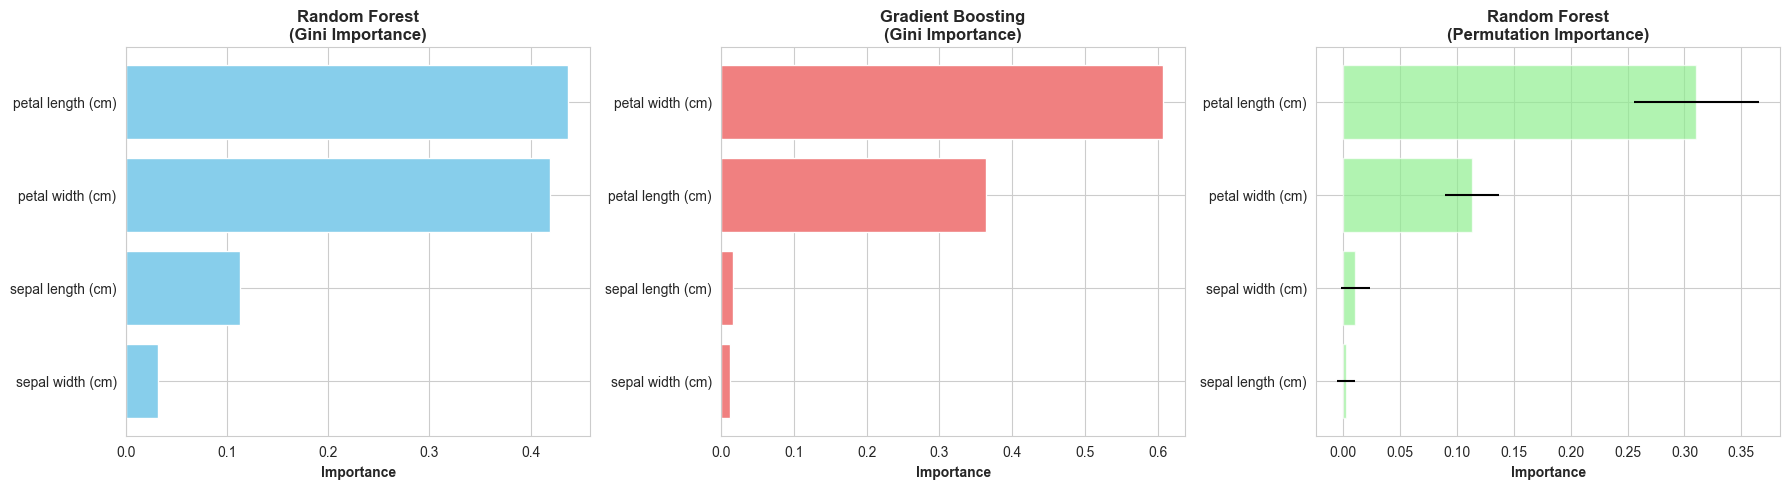

In [34]:
# Visualize feature importance comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Random Forest Gini Importance
axes[0].barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
axes[0].set_xlabel('Importance', fontweight='bold')
axes[0].set_title('Random Forest\n(Gini Importance)', fontweight='bold')
axes[0].invert_yaxis()

# Plot 2: Gradient Boosting Gini Importance
axes[1].barh(gb_importance_df['Feature'], gb_importance_df['Importance'], color='lightcoral')
axes[1].set_xlabel('Importance', fontweight='bold')
axes[1].set_title('Gradient Boosting\n(Gini Importance)', fontweight='bold')
axes[1].invert_yaxis()

# Plot 3: Permutation Importance with error bars
axes[2].barh(perm_importance_df['Feature'], perm_importance_df['Importance'], 
             xerr=perm_importance_df['Std'], color='lightgreen', alpha=0.7)
axes[2].set_xlabel('Importance', fontweight='bold')
axes[2].set_title('Random Forest\n(Permutation Importance)', fontweight='bold')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

## 6. Model Explainability with SHAP and LIME (Local Interpretable Model-agnostic Explanations)

### SHAP (SHapley Additive exPlanations)

SHAP provides a unified framework for interpreting predictions based on game theory (Shapley values).

**Key Concepts:**
- **Shapley Values**: Fair attribution of prediction to each feature
- **Additive Feature Attribution**: Sum of SHAP values = model output - base value
- **Consistency**: If a feature contributes more, it always receives higher importance

**Types of SHAP Explainers:**
- **TreeExplainer**: Fast, exact for tree-based models (RF, GBM, XGBoost)
- **KernelExplainer**: Model-agnostic, slower
- **DeepExplainer**: For neural networks
- **LinearExplainer**: For linear models

**Visualizations:**
- **Force plots**: Show how features push prediction from base value
- **Summary plots**: Global feature importance across all samples
- **Dependence plots**: Feature interactions
- **Waterfall plots**: Individual prediction breakdown

In [39]:
# Install SHAP if not already installed
# !pip install shap

import shap

# Initialize SHAP explainer for Random Forest
explainer_rf = shap.TreeExplainer(rf)

# Create SHAP values with proper feature names
shap_values_rf = explainer_rf(Xte)
shap_values_rf.feature_names = feature_names

# Get expected value (base value)
print(f"Base value (expected prediction): {explainer_rf.expected_value}")
print(f"SHAP values shape: {shap_values_rf.values.shape}")
print()

Base value (expected prediction): [0.32785714 0.33589286 0.33625   ]
SHAP values shape: (38, 4, 3)



/var/folders/x9/g11f20ps45b0l8hqg5022bnr0000gp/T/ipykernel_16385/2184483202.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_rf, Xte, feature_names=feature_names, show=False)


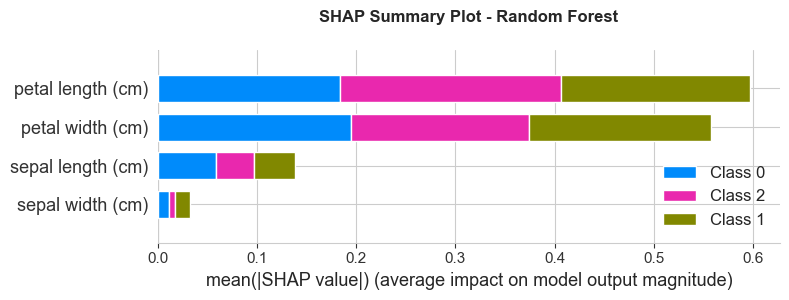

In [40]:
# 1. SHAP Summary Plot - Global feature importance
# Shows distribution of SHAP values for each feature across all predictions
shap.summary_plot(shap_values_rf, Xte, feature_names=feature_names, show=False)
plt.title('SHAP Summary Plot - Random Forest', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

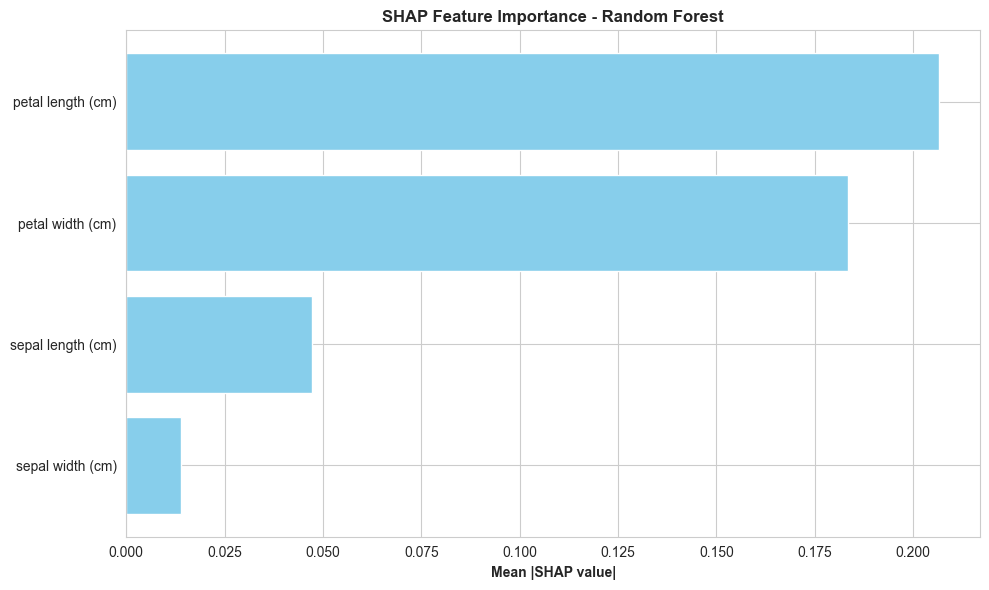

In [21]:
# 2. SHAP Bar Plot - Mean absolute SHAP values (feature importance)
# For multi-class, we need to compute mean absolute values across all classes
shap_values_mean = np.abs(shap_values_rf.values).mean(axis=(0, 2))
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': shap_values_mean
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Mean |SHAP value|', fontweight='bold')
plt.title('SHAP Feature Importance - Random Forest', fontweight='bold')
plt.tight_layout()
plt.show()

Explaining prediction for sample 0
True label: 0
Predicted label: 0
Predicted probabilities: [1. 0. 0.]

Feature values:
  sepal length (cm): 4.40
  sepal width (cm): 3.00
  petal length (cm): 1.30
  petal width (cm): 0.20



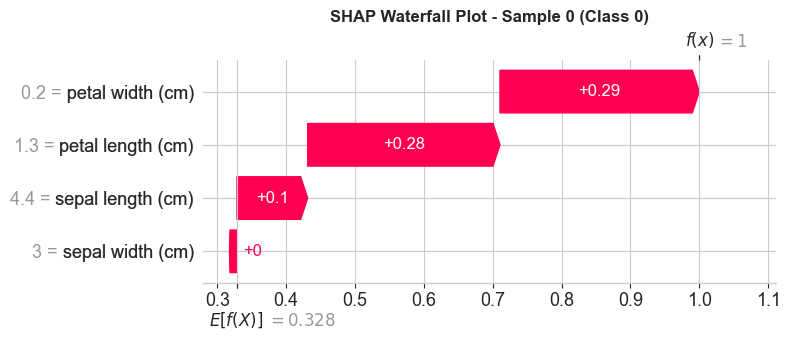

In [29]:
# 3. SHAP Waterfall Plot - Explain a single prediction
# Select first test sample
sample_idx = 0
print(f"Explaining prediction for sample {sample_idx}")
print(f"True label: {yte[sample_idx]}")
print(f"Predicted label: {rf.predict(Xte[sample_idx:sample_idx+1])[0]}")
print(f"Predicted probabilities: {rf.predict_proba(Xte[sample_idx:sample_idx+1])[0]}")
print()

# Print feature values for this sample
print("Feature values:")
for i, fname in enumerate(feature_names):
    print(f"  {fname}: {Xte[sample_idx, i]:.2f}")
print()

# For multi-class, show waterfall for predicted class
predicted_class = rf.predict(Xte[sample_idx:sample_idx+1])[0]
shap.plots.waterfall(shap_values_rf[sample_idx, :, predicted_class], show=False)
plt.title(f'SHAP Waterfall Plot - Sample {sample_idx} (Class {predicted_class})', fontweight='bold')
plt.tight_layout()
plt.show()

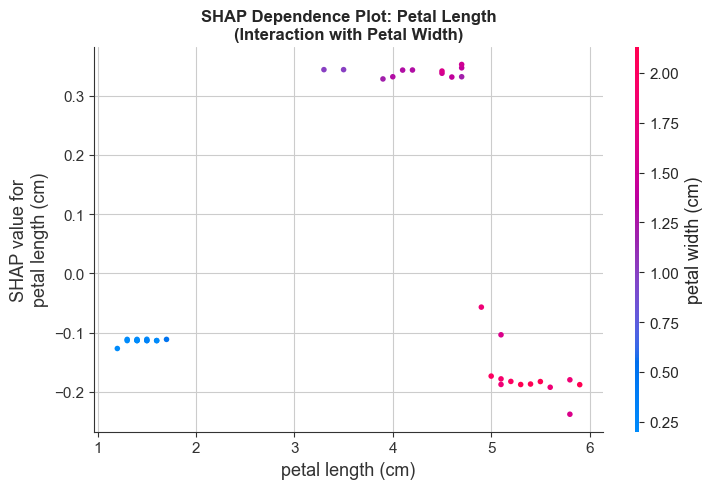

In [22]:
# 4. SHAP Dependence Plot - Show feature interactions
# Shows how a feature's value affects predictions and its interaction with another feature
shap.dependence_plot(
    'petal length (cm)', 
    shap_values_rf.values[:, :, 1],  # Class 1 (versicolor)
    Xte, 
    feature_names=feature_names,
    interaction_index='petal width (cm)',
    show=False
)
plt.title('SHAP Dependence Plot: Petal Length\n(Interaction with Petal Width)', fontweight='bold')
plt.tight_layout()
plt.show()

Explaining prediction for sample 10
Predicted class: 2



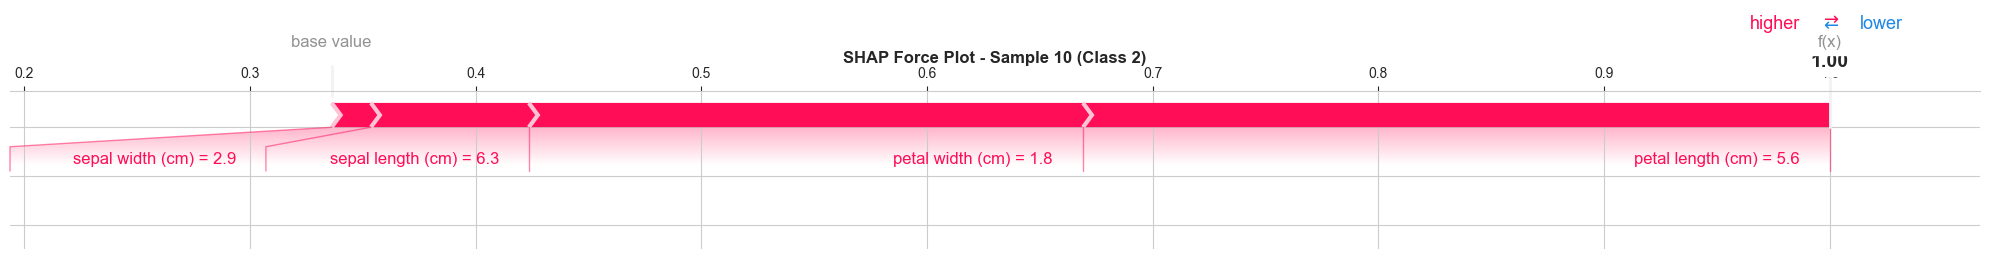

In [ ]:
# 5. SHAP Force Plot - Show feature contributions pushing prediction from base value
sample_idx = 10
predicted_class = rf.predict(Xte[sample_idx:sample_idx+1])[0]

print(f"Explaining prediction for sample {sample_idx}")
print(f"Predicted class: {predicted_class}")
print()

# Create force plot using matplotlib backend
shap.plots.force(
    explainer_rf.expected_value[predicted_class],
    shap_values_rf.values[sample_idx, :, predicted_class],
    Xte[sample_idx, :],
    feature_names=feature_names,
    matplotlib=True,
    show=False
)
plt.title(f'SHAP Force Plot - Sample {sample_idx} (Class {predicted_class})', fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Model Explainability with LIME

### LIME (Local Interpretable Model-agnostic Explanations)

LIME explains individual predictions by approximating the model locally with an interpretable model.

**How LIME Works:**
1. **Perturb data**: Generate synthetic samples near the instance to explain
2. **Get predictions**: Use the black-box model to predict on synthetic samples
3. **Weight samples**: Based on proximity to the original instance
4. **Train interpretable model**: Fit a simple model (e.g., linear) on weighted samples
5. **Extract explanation**: Use the simple model to explain the prediction

**Key Differences from SHAP:**
- **LIME**: Local approximation, faster, may be less consistent
- **SHAP**: Global framework, theoretically grounded, more consistent

**When to Use LIME:**
- Need quick explanations
- Working with any model type (images, text, tabular)
- Don't need exact attribution
- Want to understand local decision boundaries

In [12]:
# Install LIME if not already installed
# !pip install lime

import lime
import lime.lime_tabular

# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=Xtr,
    feature_names=feature_names,
    class_names=['setosa', 'versicolor', 'virginica'],
    mode='classification',
    random_state=42
)

print("LIME Explainer initialized successfully")
print(f"Training data shape: {Xtr.shape}")

LIME Explainer initialized successfully
Training data shape: (112, 4)


In [13]:
# Explain individual predictions with LIME
sample_idx = 0
instance = Xte[sample_idx]

# Get explanation
lime_exp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=rf.predict_proba,
    num_features=4,
    top_labels=3
)

print(f"Explaining sample {sample_idx}")
print(f"True label: {yte[sample_idx]} ({['setosa', 'versicolor', 'virginica'][yte[sample_idx]]})")
print(f"Predicted label: {rf.predict([instance])[0]} ({['setosa', 'versicolor', 'virginica'][rf.predict([instance])[0]]})")
print(f"Predicted probabilities: {rf.predict_proba([instance])[0]}")
print()

# Show explanation for predicted class
predicted_class = rf.predict([instance])[0]
print(f"LIME Explanation for class {predicted_class} ({['setosa', 'versicolor', 'virginica'][predicted_class]}):")
print(lime_exp.as_list(label=predicted_class))

Explaining sample 0
True label: 0 (setosa)
Predicted label: 0 (setosa)
Predicted probabilities: [1. 0. 0.]

LIME Explanation for class 0 (setosa):
[('petal length (cm) <= 1.60', 0.42204651452907993), ('petal width (cm) <= 0.30', 0.40354714491700333), ('sepal length (cm) <= 5.17', 0.05586122007549219), ('2.80 < sepal width (cm) <= 3.00', -0.004143723165387722)]


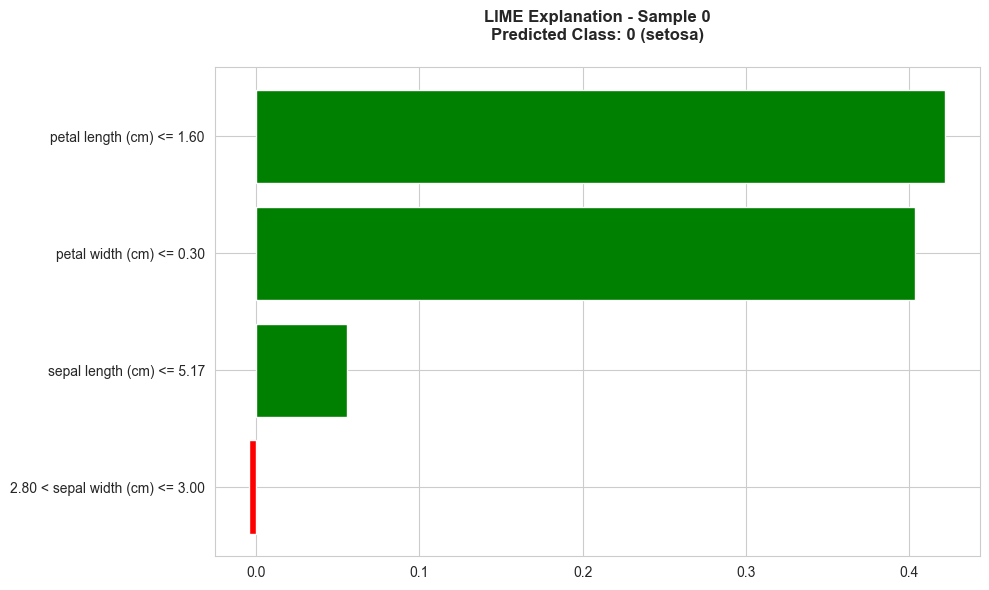

In [14]:
# Visualize LIME explanation
fig = lime_exp.as_pyplot_figure(label=predicted_class)
plt.title(f'LIME Explanation - Sample {sample_idx}\nPredicted Class: {predicted_class} ({["setosa", "versicolor", "virginica"][predicted_class]})', 
          fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

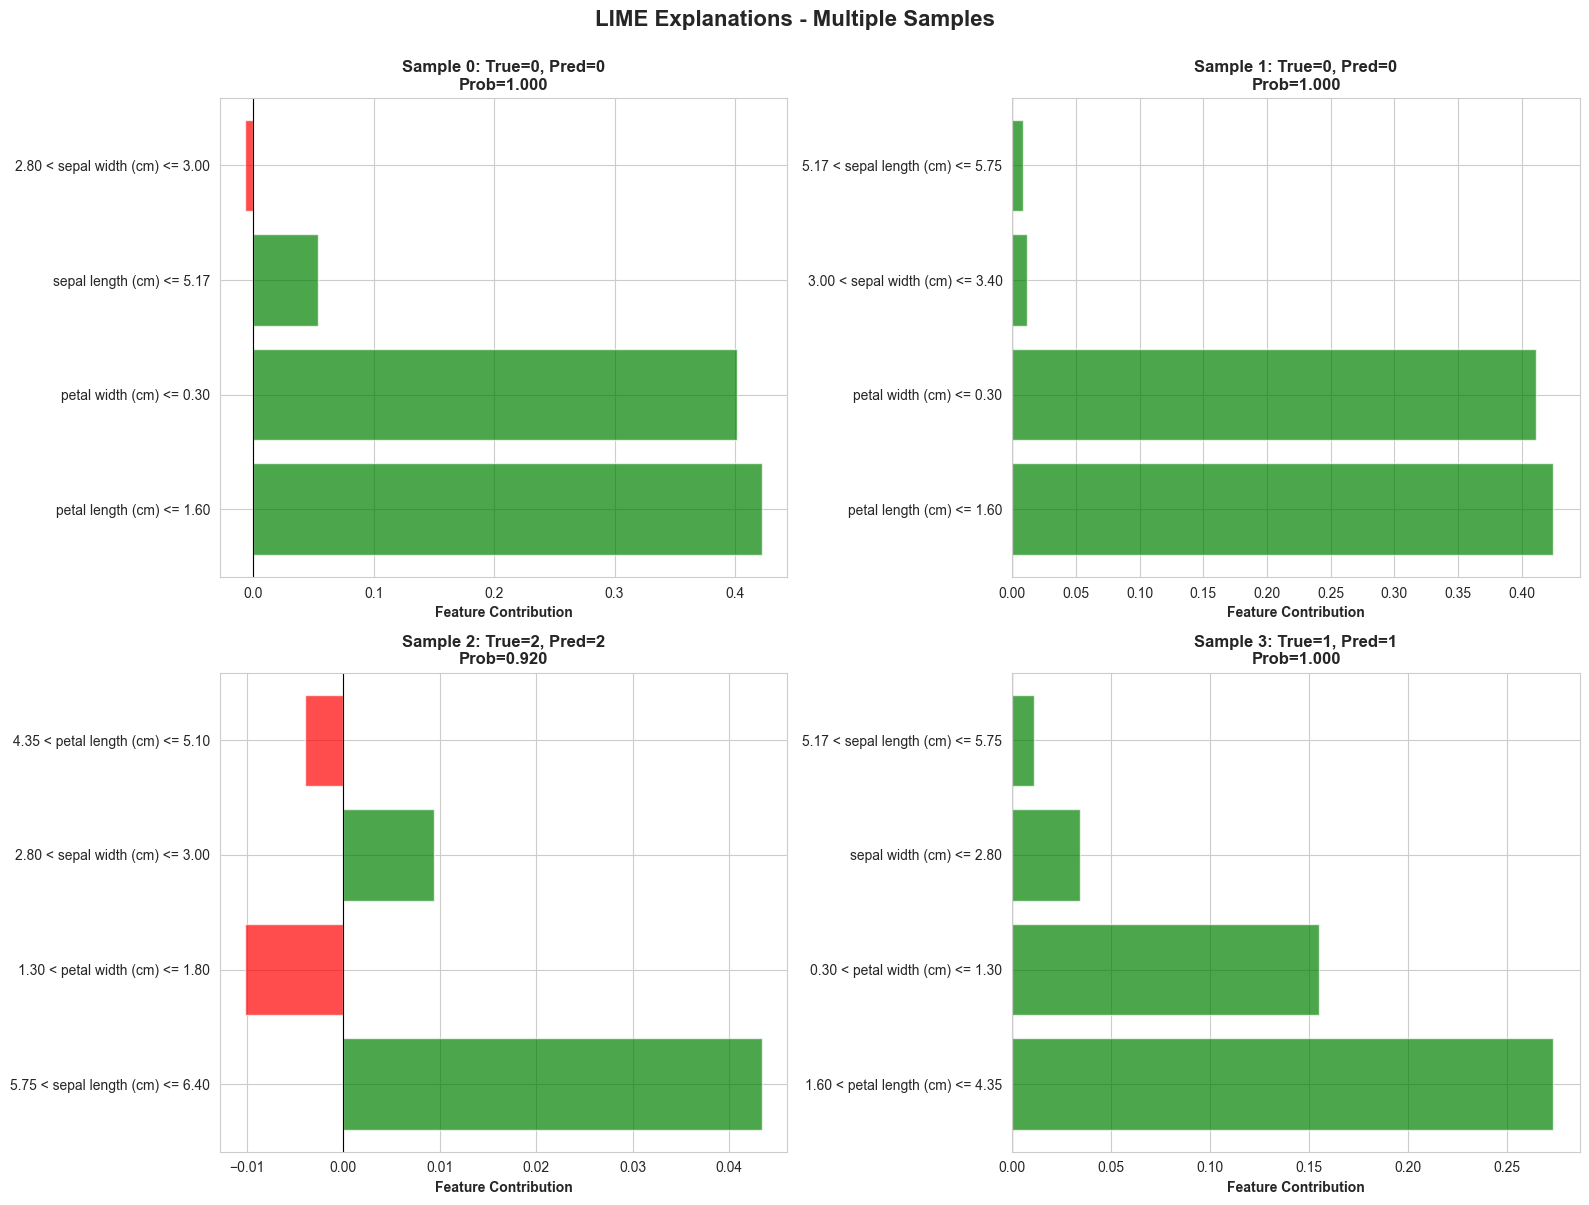

In [30]:
# Compare LIME explanations for multiple samples
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i in range(4):
    instance = Xte[i]
    lime_exp = lime_explainer.explain_instance(
        data_row=instance,
        predict_fn=rf.predict_proba,
        num_features=4,
        top_labels=1
    )
    
    predicted_class = rf.predict([instance])[0]
    true_class = yte[i]
    
    # Get feature contributions
    exp_list = lime_exp.as_list(label=predicted_class)
    features = [item[0] for item in exp_list]
    values = [item[1] for item in exp_list]
    
    # Plot
    colors = ['green' if v > 0 else 'red' for v in values]
    axes[i].barh(features, values, color=colors, alpha=0.7)
    axes[i].set_xlabel('Feature Contribution', fontweight='bold')
    axes[i].set_title(f'Sample {i}: True={true_class}, Pred={predicted_class}\nProb={rf.predict_proba([instance])[0][predicted_class]:.3f}',
                     fontweight='bold')
    axes[i].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

plt.suptitle('LIME Explanations - Multiple Samples', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 8. SHAP vs LIME Comparison

### Key Differences

| Aspect | SHAP | LIME |
|--------|------|------|
| **Theoretical Foundation** | Game theory (Shapley values) | Local linear approximation |
| **Consistency** | Consistent and fair attribution | May vary between runs |
| **Computation Speed** | Fast for trees, slower for others | Generally fast |
| **Global vs Local** | Both global and local explanations | Primarily local |
| **Model Types** | Best for tree-based models | Model-agnostic |
| **Additivity** | SHAP values sum to prediction | Not guaranteed |
| **Interpretability** | More mathematically rigorous | Intuitive and simple |
| **Feature Interactions** | Captures interactions well | Limited interaction detection |

### When to Use Each:

**Use SHAP when:**
- Working with tree-based models (Random Forest, XGBoost, LightGBM)
- Need consistent and reproducible explanations
- Want both global feature importance and local explanations
- Need to understand feature interactions
- Mathematical rigor is important

**Use LIME when:**
- Working with any model type (including deep learning)
- Need quick explanations
- Want simple, intuitive explanations
- Local approximations are sufficient
- Computational resources are limited

### Best Practice:
- Use both methods and compare results
- SHAP for tree models, LIME for others
- Combine with domain knowledge for validation

In [31]:
# Side-by-side comparison of SHAP and LIME for the same prediction
sample_idx = 5
instance = Xte[sample_idx]
predicted_class = rf.predict([instance])[0]

print(f"Comparing SHAP vs LIME for Sample {sample_idx}")
print(f"True label: {yte[sample_idx]}, Predicted: {predicted_class}")
print(f"Predicted probabilities: {rf.predict_proba([instance])[0]}")
print()

# SHAP values for this sample
shap_values_sample = shap_values_rf[sample_idx, :, predicted_class].values
shap_contributions = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': shap_values_sample
}).sort_values('SHAP Value', key=abs, ascending=False)

print("SHAP Feature Contributions:")
print(shap_contributions)
print()

# LIME explanation for the same sample
lime_exp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=rf.predict_proba,
    num_features=4,
    top_labels=1
)

lime_contributions = pd.DataFrame(
    lime_exp.as_list(label=predicted_class),
    columns=['Feature', 'LIME Value']
)

print("LIME Feature Contributions:")
print(lime_contributions)
print()

Comparing SHAP vs LIME for Sample 5
True label: 1, Predicted: 1
Predicted probabilities: [0. 1. 0.]

SHAP Feature Contributions:
             Feature  SHAP Value
2  petal length (cm)    0.343224
3   petal width (cm)    0.259912
0  sepal length (cm)    0.057584
1   sepal width (cm)    0.003388

LIME Feature Contributions:
                            Feature  LIME Value
0  1.60 < petal length (cm) <= 4.35    0.279481
1   0.30 < petal width (cm) <= 1.30    0.147538
2  5.17 < sepal length (cm) <= 5.75    0.026063
3   2.80 < sepal width (cm) <= 3.00   -0.004853



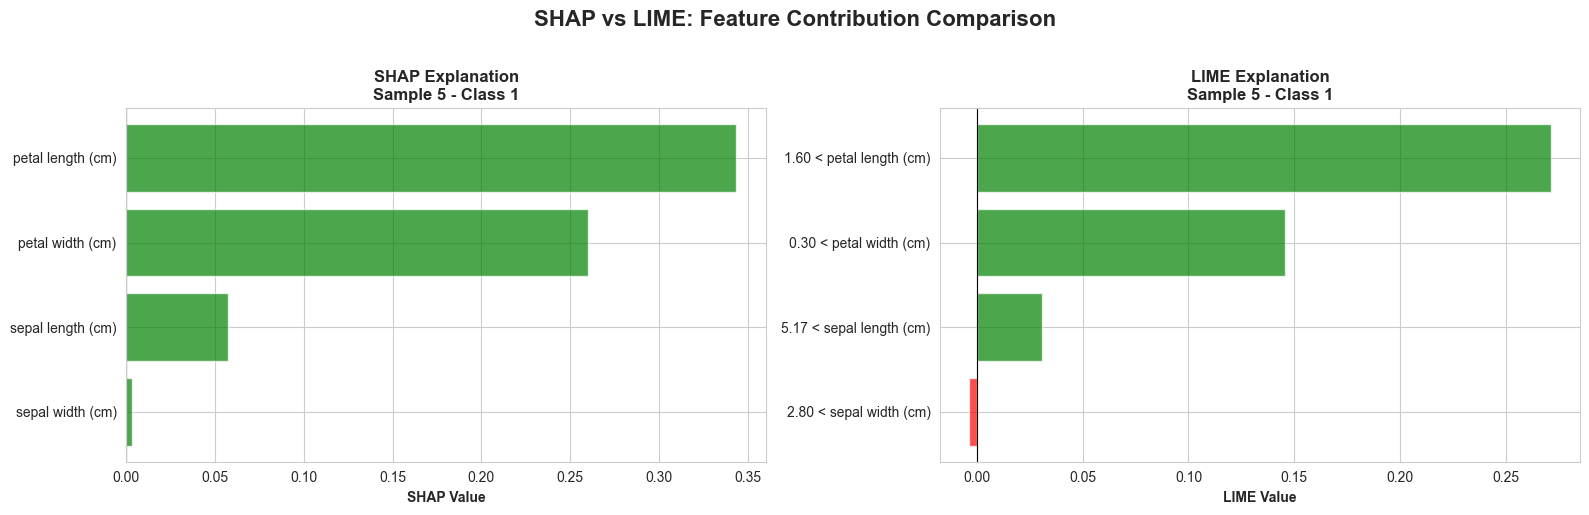

In [16]:
# Visual comparison of SHAP vs LIME
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# SHAP plot
shap_df = shap_contributions.copy()
colors_shap = ['green' if v > 0 else 'red' for v in shap_df['SHAP Value']]
axes[0].barh(shap_df['Feature'], shap_df['SHAP Value'], color=colors_shap, alpha=0.7)
axes[0].set_xlabel('SHAP Value', fontweight='bold')
axes[0].set_title(f'SHAP Explanation\nSample {sample_idx} - Class {predicted_class}', fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].invert_yaxis()

# LIME plot
# Extract feature names and values from LIME output
lime_features = []
lime_values = []
for item in lime_exp.as_list(label=predicted_class):
    lime_features.append(item[0].split('<=')[0].split('>')[0].strip())
    lime_values.append(item[1])

colors_lime = ['green' if v > 0 else 'red' for v in lime_values]
axes[1].barh(lime_features, lime_values, color=colors_lime, alpha=0.7)
axes[1].set_xlabel('LIME Value', fontweight='bold')
axes[1].set_title(f'LIME Explanation\nSample {sample_idx} - Class {predicted_class}', fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].invert_yaxis()

plt.suptitle('SHAP vs LIME: Feature Contribution Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Summary of Feature Importance & Explainability

**Feature Importance Methods:**
1. **Built-in Tree Importance**: Fast, good for initial screening
2. **Permutation Importance**: Model-agnostic, more reliable
3. **SHAP**: Theoretically grounded, best for tree models
4. **LIME**: Simple, works with any model

**Practical Workflow:**
1. Start with built-in feature importance for quick insights
2. Use SHAP for detailed analysis of tree-based models
3. Use LIME for model-agnostic explanations or non-tree models
4. Compare multiple methods to validate findings
5. Always validate with domain expertise

**Key Insights from Iris Dataset:**
- Petal measurements (length & width) are most important
- Sepal measurements contribute less to classification
- SHAP and LIME generally agree on feature ranking
- Individual predictions show how features interact locally